In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [2]:
# Import All classifcation Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [3]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,validation_curve,KFold

In [6]:
# read data file
df1 = pd.read_csv('2_SalesEffect_Cleaned_Encoded.csv')
print(df1.shape)

(6574, 6)


,c_Product_ID,c_Source,c_Sales_Agent,c_Location,c_Delivery_Mode,y_Status
0,8,16,4,1,0,1
1,18,2,5,10,4,1
2,17,23,1,13,0,1
3,14,23,8,6,0,0
4,17,2,8,1,0,1


In [7]:
X1 = df1.iloc[:,:-1]
y1 = df1.y_Status

In [8]:
# Split
seed = 10
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=seed, test_size=.3)

In [9]:
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB_gbtree', XGBClassifier(booster='gbtree')))
models.append(('XGB_dart', XGBClassifier(booster='dart')))
models.append(('SVM', SVC()))
models.append(('ANN', MLPClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [10]:
# evaluate each model in turn with X1, y1 based on Accuracy
seed = 10
results = []
names = []
output = []
score = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model,np.array(X1_train),np.array(y1_train),cv=kfold,scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    output.append(msg)

# Take top 2-3 algorithms that give best accuracy
print(output)

E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change 

['RF: 0.576609 (0.030235)', 'KNN: 0.583566 (0.028260)', 'CART: 0.570093 (0.027460)', 'NB: 0.581603 (0.023386)', 'XGB_gbtree: 0.627685 (0.025711)', 'XGB_dart: 0.627685 (0.025711)', 'SVM: 0.608121 (0.028187)', 'ANN: 0.590083 (0.028473)', 'GBC: 0.630946 (0.028730)']


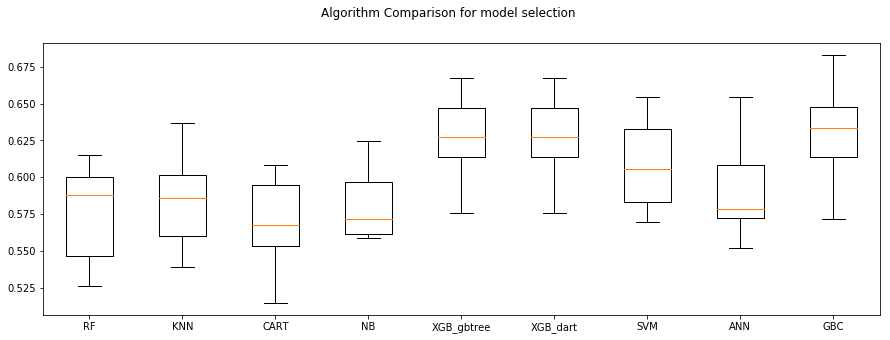

In [11]:
# boxplot KFold using 10 splits - algorithm comparison
rcParams['figure.figsize'] =15,5

# Put figure title
fig = plt.figure()
fig.suptitle('Algorithm Comparison for model selection')
ax = fig.add_subplot(111)
# draw plot
plt.boxplot(results)
# label in X axis
ax.set_xticklabels(names)
# Show the plot
plt.show()